# Estudo de Caso – Covid-19 e Óbitos

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## 📥 1. Importação e Exploração dos Dados

In [ ]:

df = pd.read_csv("/content/Dados_Covid_-_Regress_o_Linear.csv")  # Suba o arquivo no Colab
df.head()


,populacao,densidade_demografica,idosos_pct,leitos_uti,indice_isolamento,renda_media,obitos_covid
0,126958,8384.903760,17.146794,4,0.556284,803.804508,0
1,151867,4692.244666,11.419414,4,0.465570,3803.994785,138
2,136932,4154.046828,12.121823,10,0.408023,1518.975924,941
3,370838,2741.336649,12.682249,3,0.382735,1238.826060,751
4,264178,573.191212,25.075647,2,0.561609,1797.567706,806


In [ ]:

print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   populacao              1000 non-null   int64  
 1   densidade_demografica  1000 non-null   float64
 2   idosos_pct             1000 non-null   float64
 3   leitos_uti             1000 non-null   int64  
 4   indice_isolamento      1000 non-null   float64
 5   renda_media            1000 non-null   float64
 6   obitos_covid           1000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 54.8 KB
None
           populacao  densidade_demografica   idosos_pct   leitos_uti  \
count    1000.000000            1000.000000  1000.000000  1000.000000   
mean   246754.629000            4971.331251    17.499275     4.914000   
std    144173.783075            2911.852530     7.150254     2.096903   
min      6015.000000              56.273910     5.039128     0.000000   
25%   

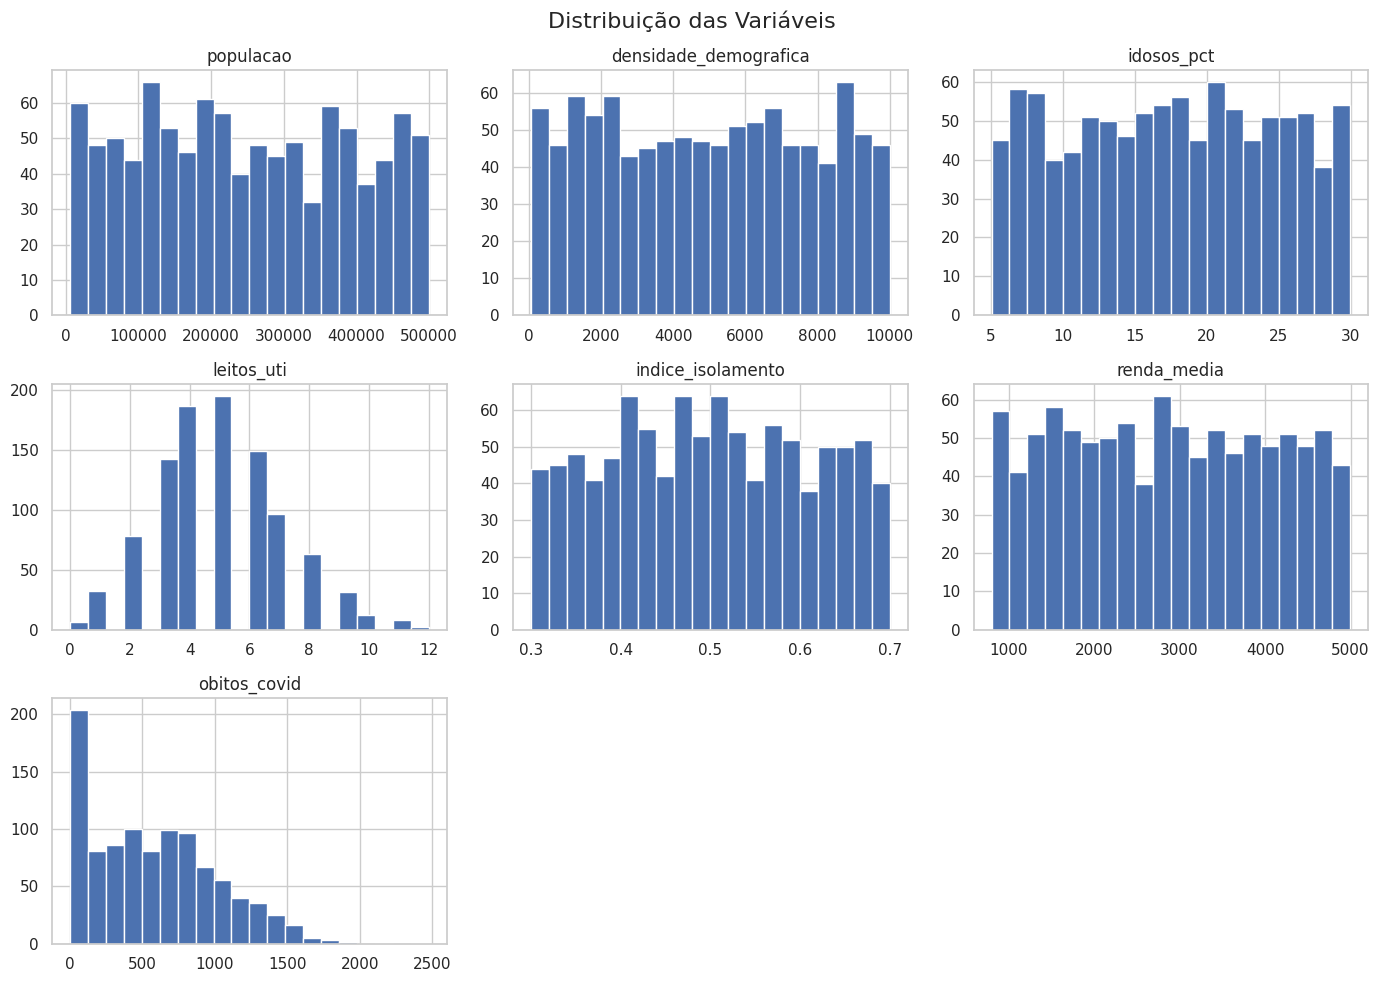

In [ ]:

df.hist(bins=20, figsize=(14, 10), layout=(3, 3))
plt.suptitle("Distribuição das Variáveis", fontsize=16)
plt.tight_layout()
plt.show()


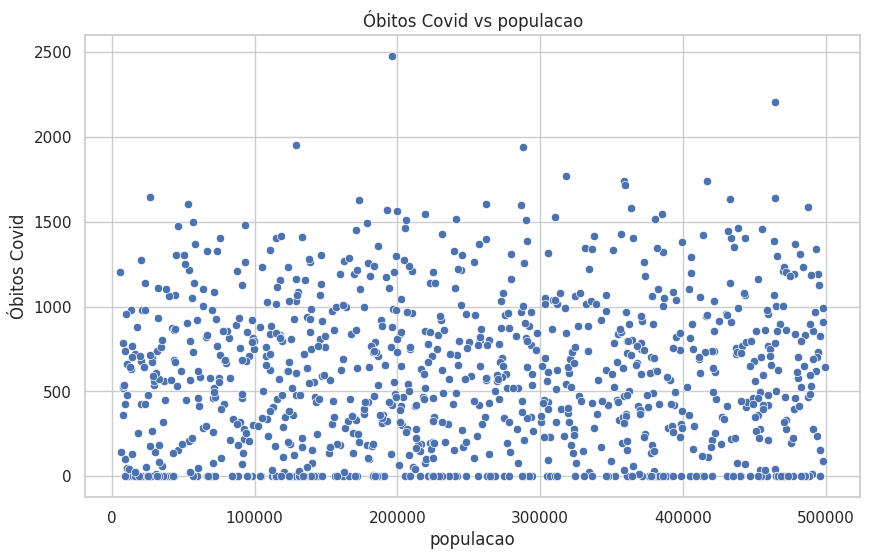

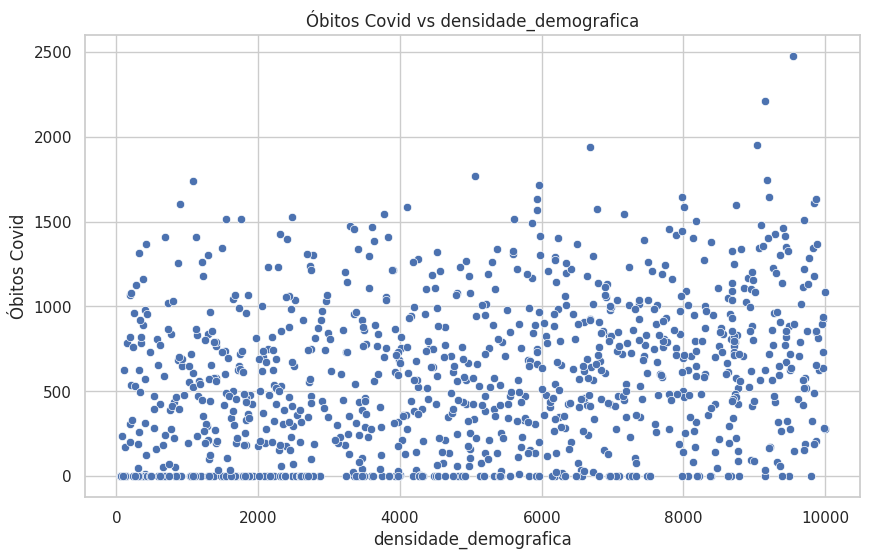

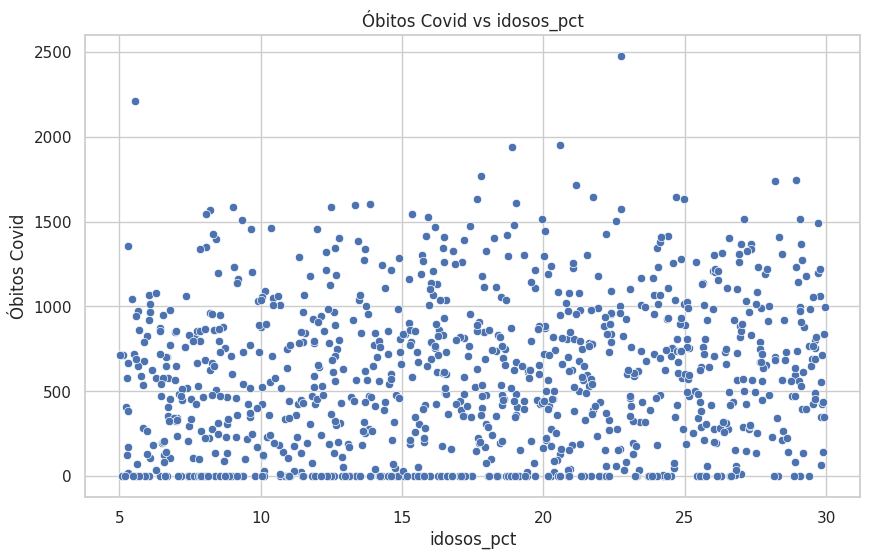

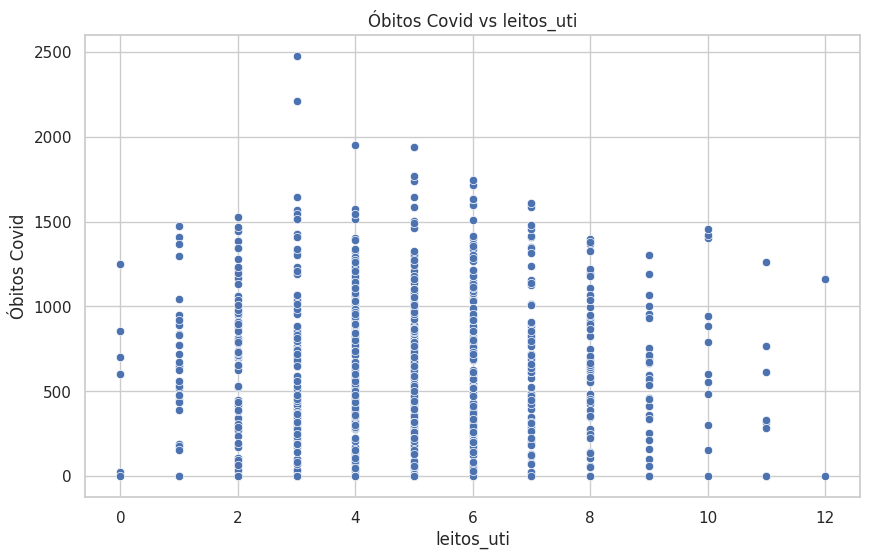

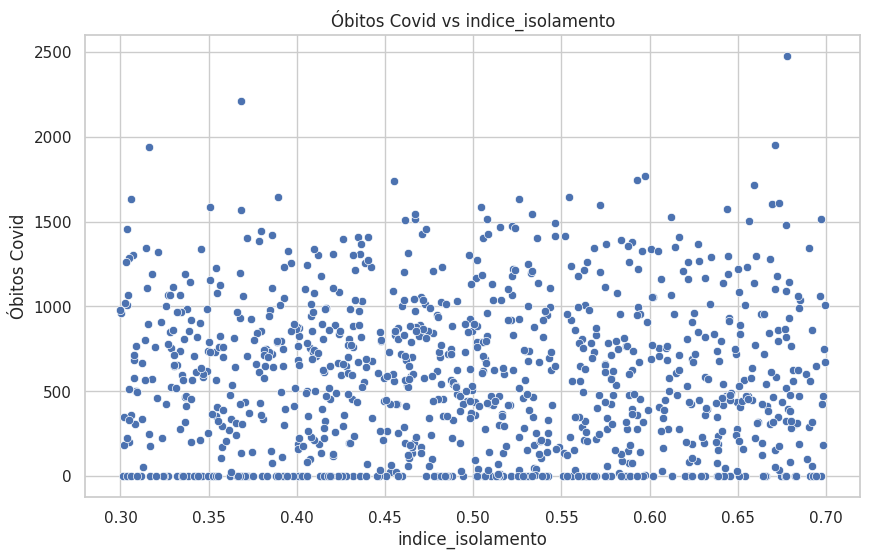

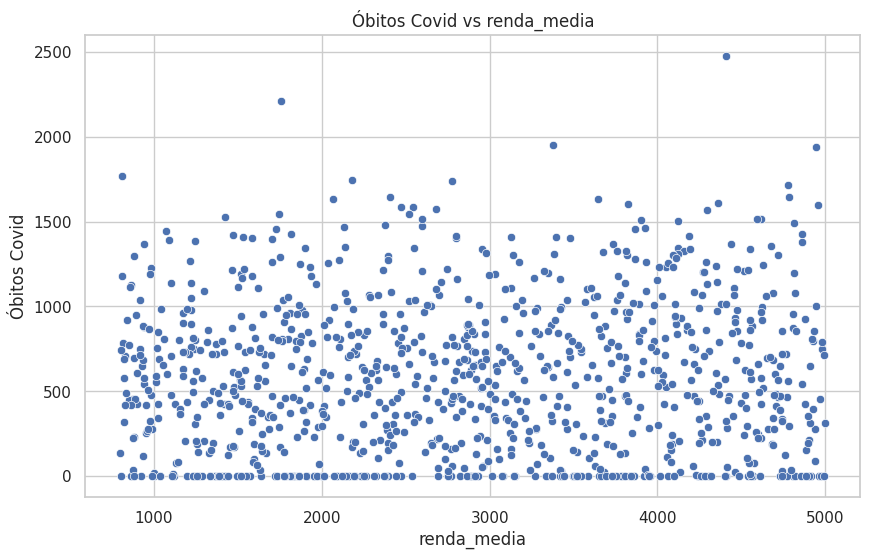

In [ ]:

variaveis = ['populacao', 'densidade_demografica', 'idosos_pct',
             'leitos_uti', 'indice_isolamento', 'renda_media']

for var in variaveis:
    sns.scatterplot(x=var, y='obitos_covid', data=df)
    plt.title(f"Óbitos Covid vs {var}")
    plt.xlabel(var)
    plt.ylabel("Óbitos Covid")
    plt.show()


## 🤖 2. Criação do Modelo de Regressão Linear

In [ ]:

X = df[variaveis]
y = df['obitos_covid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

coeficientes = pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": modelo.coef_
})
print(coeficientes)


                Variável  Coeficiente
0              populacao     0.000185
1  densidade_demografica     0.033633
2             idosos_pct     7.434534
3             leitos_uti   -10.228255
4      indice_isolamento  -134.297995
5            renda_media     0.013468


## 📊 3. Avaliação do Modelo

In [ ]:

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 368.86
MSE: 205151.77
R²: 0.13


## 📚 4. Interpretação

In [ ]:

from IPython.display import Markdown

Markdown(f'''
### 📚 Interpretação dos Resultados

- **Variável com maior impacto positivo:** `{coeficientes.sort_values('Coeficiente', ascending=False).iloc[0]['Variável']}`
- **Variável com maior impacto negativo:** `{coeficientes.sort_values('Coeficiente').iloc[0]['Variável']}`

- **O índice de isolamento social ajudou a reduzir óbitos?**
  {'Sim, pois o coeficiente é negativo.' if coeficientes[coeficientes['Variável'] == 'indice_isolamento']['Coeficiente'].values[0] < 0 else 'Não, o coeficiente é positivo.'}

- **Há alguma variável sem relação clara com óbitos?**
  Variáveis com coeficiente próximo de 0 podem ter baixa influência.
''')



### 📚 Interpretação dos Resultados

- **Variável com maior impacto positivo:** `idosos_pct`
- **Variável com maior impacto negativo:** `indice_isolamento`

- **O índice de isolamento social ajudou a reduzir óbitos?**  
  Sim, pois o coeficiente é negativo.

- **Há alguma variável sem relação clara com óbitos?**  
  Variáveis com coeficiente próximo de 0 podem ter baixa influência.


## 💬 5. Discussão


### 💬 Discussão

- **Variáveis que poderiam ser adicionadas:**
  - Taxa de vacinação
  - Tempo médio de internação
  - Número de profissionais da saúde
  - Indicadores regionais (ex: IDH)

- **Limitações:**
  - Dados agregados não capturam desigualdades intra-municipais
  - Não é possível garantir causalidade
  - Modelo linear pode não capturar todas as interações

- **Uso para políticas públicas:**
  Sim, como ferramenta de apoio, mas com cautela. Decisões devem ser baseadas em múltiplas fontes e evidências.
